## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

## Import Datasets

In [2]:
path = r"C:\Users\18478\OneDrive\Desktop\Career Foundry Data Analytics Course\Career Foundry Machine Learning\Data Sets"

In [3]:
climate = pd.read_csv(os.path.join(path, 'Unsupervised', 'weather_dataset_unscaled_prepared_with_date.csv') , index_col = False)

In [4]:
pleasant =  pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [5]:
climate.shape

(22950, 137)

In [6]:
# Filter data (climate) to only one decade
# This reduces the dataset to one decade to speed up training and improve consistency
climate_decade = climate[
    (climate['DATE'].astype(str).str[:4] >= '2010') &
    (climate['DATE'].astype(str).str[:4] <= '2019')
]

# Preview the filtered data
climate_decade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.9965,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,7,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0193,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.01

## Prapare Data

In [7]:
# Filter answers dataset (pleasant weather) for the same time period
# This ensures your features (X) and labels (y) match in time
pleasantweather_decade = pleasant[
    (pleasant['DATE'].astype(str).str[:4] >= '2010') &
    (pleasant['DATE'].astype(str).str[:4] <= '2019')
]

# Preview the filtered labels
pleasantweather_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Set display options to show all rows 

pd.set_option('display.max_rows', None)

# Extract station prefixes from column names
# Assuming format is 'STATION_VARIABLE' 

stations = [col.split('_')[0] for col in climate_decade.columns if '_' in col]

# Get unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [9]:
# Create a dictionary to store the number of valid (non-missing) entries per station
station_frequencies = {}

for station in unique_stations:
    # Select all columns that belong to the current station
    station_columns = [col for col in climate_decade.columns if col.startswith(station)]
    
    # Count rows where all station-specific columns have non-null values
    # This is a slightly more precise method than summing over all values
    complete_entries = climate_decade[station_columns].dropna().shape[0]
    
    # Store the count in the dictionary
    station_frequencies[station] = complete_entries

# Print the frequency of valid entries for each weather station
print("Frequency of complete entries per weather station (rows without missing data):")
for station, freq in sorted(station_frequencies.items()):
    print(f"{station}: {freq} entries")

Frequency of complete entries per weather station (rows without missing data):
BASEL: 3652 entries
BELGRADE: 3652 entries
BUDAPEST: 3652 entries
DEBILT: 3652 entries
DUSSELDORF: 3652 entries
HEATHROW: 3652 entries
KASSEL: 3652 entries
LJUBLJANA: 3652 entries
MAASTRICHT: 3652 entries
MADRID: 3652 entries
MUNCHENB: 3652 entries
OSLO: 3652 entries
SONNBLICK: 3652 entries
STOCKHOLM: 3652 entries
VALENTIA: 3652 entries


In [10]:
climate.shape

(22950, 137)

In [11]:
pleasant.shape

(22950, 16)

In [12]:
# Drop columns that end with wind_speed and snow_depth from the dataset

columns_to_drop = climate_decade.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index([], dtype='object')

In [13]:
climate_decade = climate_decade.drop(columns=columns_to_drop)

In [14]:
# Drop unnecessary columns

climate_decade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [15]:
climate_decade.shape 

(3652, 135)

In [16]:
pleasantweather_decade.drop(columns = 'DATE', inplace = True)

In [17]:
pleasantweather_decade.shape

(3652, 15)

## Split Data

In [18]:
X = climate_decade

In [19]:
y = pleasantweather_decade

In [20]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [21]:
X.shape

(3652, 135)

In [22]:
y.shape

(3652, 15)

In [23]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## Optimizing Hyperparameters

### Grid Search 

In [25]:
# Create a RF classifier

clf = RandomForestClassifier()

In [26]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [27]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 3.603254302342733 minutes


In [28]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.6418400876232201


In [29]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [30]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [31]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 11.916996419429779 minutes


In [32]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 60, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}
Best RANDOM search score is: 0.6374589266155531


In [33]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=50, max_features=73, min_samples_leaf=1, min_samples_split=8)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=73, min_samples_split=8,
                       n_estimators=200)

In [34]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6527929901423878


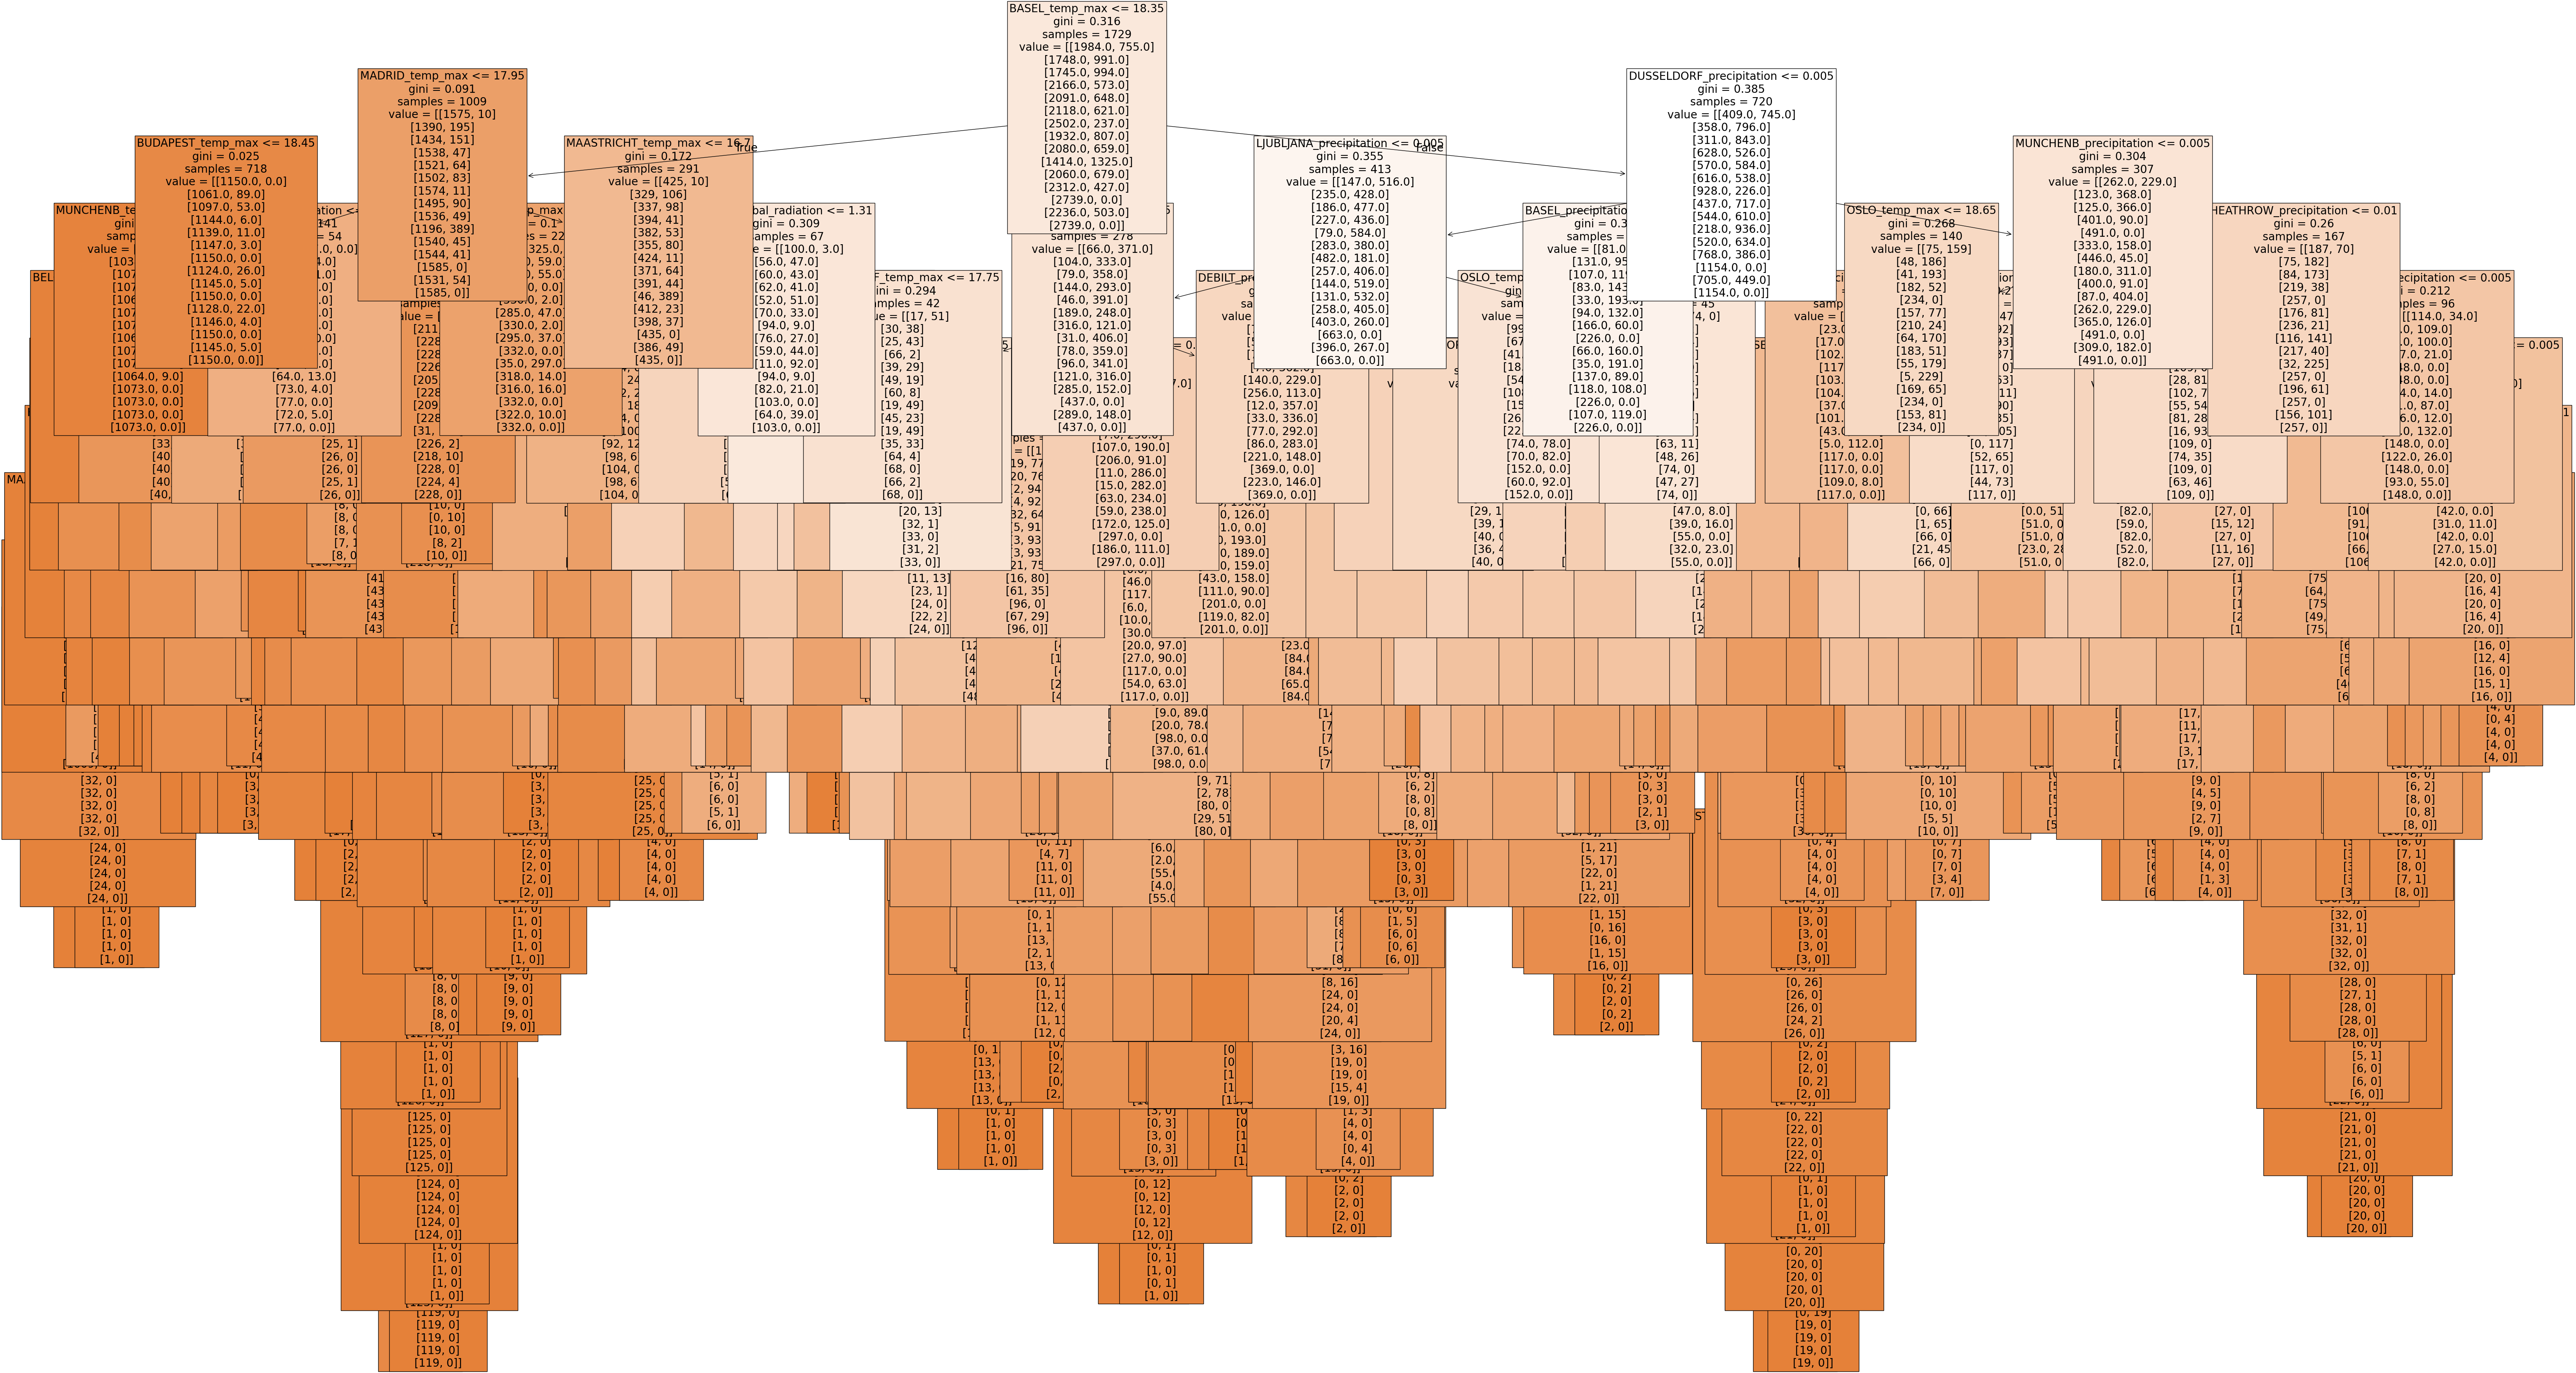

In [36]:
fig = plt.figure(figsize=(80,40))

plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = climate_decade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

# Save the figure
plt.savefig(os.path.join(path, 'random_forest_optimized_parameters.png'), dpi=300, bbox_inches='tight')  # dpi and bbox are optional


In [37]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([7.61403567e-04, 1.24177088e-03, 8.69627013e-04, 1.09785951e-03,
       3.60846933e-02, 2.63958542e-03, 4.69156510e-03, 8.14555788e-04,
       9.58945724e-02, 1.85409332e-03, 1.33278901e-03, 1.04993640e-03,
       9.09946593e-04, 3.09793015e-02, 1.23107157e-03, 2.51862208e-03,
       7.66223790e-04, 8.23857372e-03, 9.51245441e-05, 0.00000000e+00,
       0.00000000e+00, 4.74081579e-04, 3.07603569e-02, 4.79641807e-04,
       5.15222614e-03, 1.02516466e-03, 2.17952203e-02, 6.33625110e-04,
       9.58105658e-04, 1.07211525e-03, 1.24414417e-03, 1.79784101e-02,
       1.66344874e-03, 1.29535999e-03, 9.78533724e-04, 2.71621784e-02,
       3.78712846e-04, 7.91673158e-04, 8.17111254e-04, 1.02464075e-03,
       4.78603721e-02, 1.38482633e-03, 2.90397958e-03, 6.87014512e-04,
       1.50689885e-01, 9.67614275e-04, 2.03227834e-03, 1.16404537e-03,
       1.97192439e-03, 1.53377831e-02, 2.66874318e-03, 1.95686871e-03,
       1.02547211e-03, 8.86716151e-03, 4.05921919e-04, 1.09721176e-03,
      

In [39]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[7.61403567e-04, 1.24177088e-03, 8.69627013e-04, 1.09785951e-03,
         3.60846933e-02, 2.63958542e-03, 4.69156510e-03, 8.14555788e-04,
         9.58945724e-02],
        [1.85409332e-03, 1.33278901e-03, 1.04993640e-03, 9.09946593e-04,
         3.09793015e-02, 1.23107157e-03, 2.51862208e-03, 7.66223790e-04,
         8.23857372e-03],
        [9.51245441e-05, 0.00000000e+00, 0.00000000e+00, 4.74081579e-04,
         3.07603569e-02, 4.79641807e-04, 5.15222614e-03, 1.02516466e-03,
         2.17952203e-02],
        [6.33625110e-04, 9.58105658e-04, 1.07211525e-03, 1.24414417e-03,
         1.79784101e-02, 1.66344874e-03, 1.29535999e-03, 9.78533724e-04,
         2.71621784e-02],
        [3.78712846e-04, 7.91673158e-04, 8.17111254e-04, 1.02464075e-03,
         4.78603721e-02, 1.38482633e-03, 2.90397958e-03, 6.87014512e-04,
         1.50689885e-01],
        [9.67614275e-04, 2.03227834e-03, 1.16404537e-03, 1.97192439e-03,
         1.53377831e-02, 2.66874318e-03, 1.95686871e-03, 1.02547211

In [40]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.14409563, 0.04888056, 0.05978182, 0.05298592, 0.20653822,
       0.03599189, 0.02305373, 0.07429831, 0.13854958, 0.07897651,
       0.0592019 , 0.03826245, 0.0081505 , 0.02977671, 0.00145628])

In [41]:
# Extract stations list

stations = [col.split('_')[0] for col in climate_decade.columns if '_' in col]

In [42]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [45]:
# Convert the set of unique stations to a list

unique_stations_list = stations[:len(sumarray)]

In [46]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BASEL       0.206538
BASEL       0.144096
BASEL       0.138550
BELGRADE    0.078977
BASEL       0.074298
BASEL       0.059782
BELGRADE    0.059202
BASEL       0.052986
BASEL       0.048881
BELGRADE    0.038262
BASEL       0.035992
BELGRADE    0.029777
BASEL       0.023054
BELGRADE    0.008150
BELGRADE    0.001456
dtype: float64

In [47]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE']


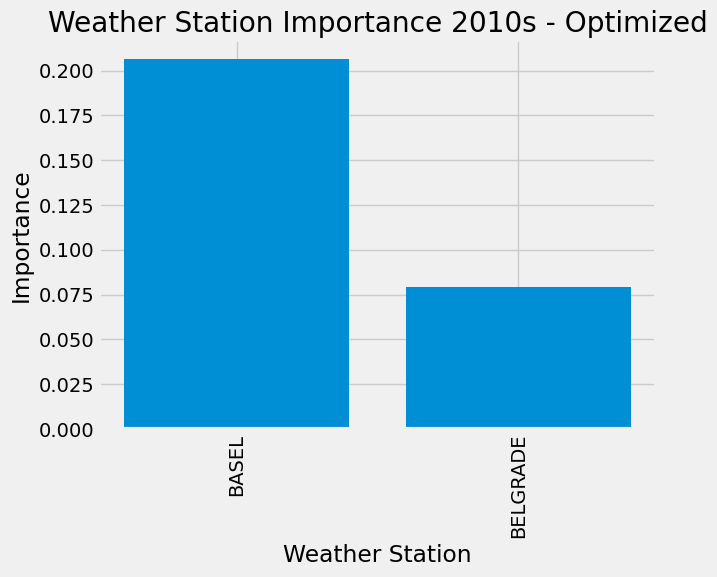

In [48]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path,'optimized_2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()